# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import numpy as np

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [2]:
#Покажем все признаки
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)</li>
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [3]:
#Общая информация по данным
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
#Видим, что есть квартиры с 0 комнат(Скорее всего это студии, поэтому их нет смысла заполнять)
data.groupby('rooms')['rooms'].count()

rooms
0      197
1     8047
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

Минимальная площадь с 0 комнат 15.5
Максимальная площадь с 0 комнат 371.0

Посмотрим на распределение, т.к не похоже, что это все студии
Примерная доля выбросов к числу бескомнатных квартир составит 0.05


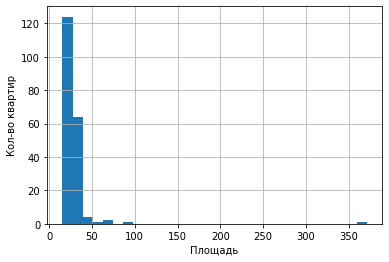

In [5]:
query_set = data[data['rooms'] == 0]
query_set['total_area'].max()
print('Минимальная площадь с 0 комнат {}'.format(query_set['total_area'].min()))
print('Максимальная площадь с 0 комнат {}'.format(query_set['total_area'].max()))
print()
print('Посмотрим на распределение, т.к не похоже, что это все студии')
query_set['total_area'].hist(bins=30).set_xlabel('Площадь(кв.м)')
#Тут вижно, что есть выбросы, возможно,что тут ошибка в самих данных
#Посмотрим на долю
plt.xlabel('Площадь')
plt.ylabel('Кол-во квартир')
print('Примерная доля выбросов к числу бескомнатных квартир составит {:.2f}'.format(len(query_set[query_set['total_area'] > 40]) / len(query_set)))


In [6]:
#Тут имеем список всех локаций, предоставленных в датасете
data.locality_name.unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [7]:
#Выведем описательную таблицу
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


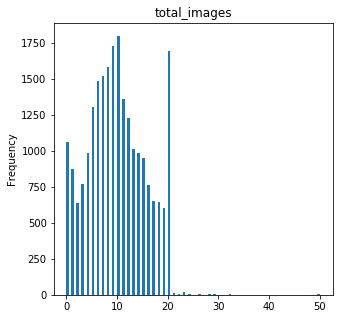

In [8]:
data['total_images'].plot(kind='hist', bins=100, figsize=(5,5), title='total_images')
# Есть объявления с 0 фотографий и незначительно число выбросов, встречающихся вдоль правого "хвоста"

Примерная доля ценовых выбросов: 0.156%


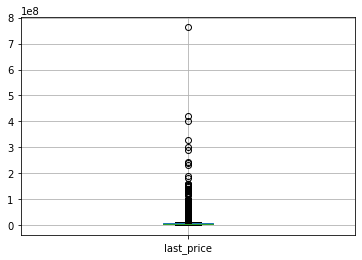

In [9]:
#data['last_price'].plot(kind='hist', bins=30, figsize=(10,5), title='last_price', range=(0, 770000000))
data.boxplot('last_price')
print('Примерная доля ценовых выбросов: {:.3%}'.format(len(data.query('last_price > 100000000')) / len(data)))
#По графику можно пронаблюдать, что крайне аномальные значения можно пронаблюдать начиная с 100 000 000
# Возможно такие цены объясняются высоким классом самого жилья

### Вывод

Имеем пропуски в таких столбцах: `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`,
 `balcony`, `locality_name`,`airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000` `ponds_nearest`, `days_exposition`

Пропуски в некоторых ячейках столбцах могут вызваны естественным отсутствием их значений. Например, в доме не может быть этажей, балконов или аэропорты от этого рйона находятся крайне далеко, и также может не быть парков, прудов. Поэтому резоннее заменить пропуски на нулевые значения в столбцах `floors_total`,`balcony`,`airports_nearest`,`cityCenters_nearest`,`parks_around3000`,`parks_nearest`,`ponds_around3000` `ponds_nearest`, если природа ошибок указывает на то, что менеджер просто пропустил эти пункты при заполнении таблицы 

Столбцы **last_price**, **floors_total**, **balcony**, **airposrts_nearest**, **cityCenters_nearest**, **parks_around3000**, **parks_nearest**, **ponds_around3000**, **ponds_nearest**, **days_exposition**  преобразуем в тип int ,т.к значения после точки не сыграют особой роли для описания этих данных, а их отсутсвие поможет нам сэкономить память

### Шаг 2. Предобработка данных

In [10]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [11]:
#Делаем замену NaN в ceiling_height на медианное значение
ceiling_height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)


In [12]:
#В этом столбце видим, что нету нулевых значений, но есть nan
#Сделаем предположение, что менеджер для одноэтажных домов просто не указал тот самый факт
#Попробуем заменить на число этажей в доме на значение из столбца floor(этаж проживания)



def replace_nan_to_floor(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floors_total != floors_total:
        return floor
    else:
        return floors_total

data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [13]:
#Удалим пропуски в floors_total, т.к их доля от всей совокупоности очень мала
data = data.drop(data[data['floors_total'] != data['floors_total']].index ).reset_index(drop=True)
#И пропуски по локации
data = data.drop(data[data['locality_name'] != data['locality_name']].index ).reset_index(drop=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             21700 non-null float64
floor                   23565 non-null int64
is_apartment            2760 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            21343 non-null float64
balcony                 12090 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around300

In [14]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [15]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [16]:
#Сформируем словарь для заполнения пропусков связанных с площадью квартир (living_area)
median_area_dict = dict(data.groupby('rooms')['total_area'].median())
median_area_dict

{0: 26.075000000000003,
 1: 36.6,
 2: 53.0,
 3: 72.8,
 4: 99.3,
 5: 146.0,
 6: 186.15,
 7: 214.0,
 8: 235.7,
 9: 300.95,
 10: 272.6,
 11: 188.89999999999998,
 12: 900.0,
 14: 304.2,
 15: 590.0,
 16: 270.0,
 19: 374.6}

In [17]:
#Функция для заполнения пропусков в living_area
def replace_nan_to_value_from_dict(row):
    rooms = row['rooms']
    living_area = row['living_area']
    if living_area != living_area:
        return median_area_dict[rooms]
    else:
        return living_area
    

In [18]:
data['living_area'] = data.apply(replace_nan_to_value_from_dict, axis=1)

In [19]:
#Исходя из самого факта прожажи - это очень важно для менеджера указать, к какому типу относится данный вид жилья
#Поэтому будем считать, что пропуск в данной категории будет означать ,что жильё не принадлежит к классу апартаметов
#Заменим значения NaN на False 

data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].value_counts()

False    23515
True        50
Name: is_apartment, dtype: int64

In [20]:
#Для заполнения пропусков в столбце kitchen_area попробуем найти отношение площади кухни к общей площади

data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']
data.head()

#Найдём среднее из этих отношений
mean_ratio = data['kitchen_area_ratio'].mean()
mean_ratio

0.18733959855294968

In [21]:
#проводим замену пропусков в столбце kitchen_area
def replace_kitchen_area_nan(row):
    total_area = row['total_area']
    kitchen_area = row['kitchen_area']
    if kitchen_area != kitchen_area:
        return total_area * mean_ratio
    else:
        return kitchen_area

In [22]:
data['kitchen_area'] = data.apply(replace_kitchen_area_nan, axis=1) 

In [23]:
# Для балконов можем предположить логичную замену, т.к возможен обратный вариант, когда их нет и их количесвто просто не указали
data['balcony'] = data['balcony'].fillna(0)

In [24]:
# Что касаемо расстояния до ближайшего аэропорта- тут возможен вариант, когда при заполнении менеджер учёл не нужным \
#заполнять данный пункт, т.к не знает расстояние в метрах или он находится довольно далеко поэтому попробуем проигнорировать \
#заполнение пропусков в данном столбце

#И будем руководствоваться этим же принципом при обработке столбца cityCenters_nearest

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 23 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around3000

In [26]:
#В столбцах parks_nearest, ponds_nearest можем устранить некоторые пропуски, а именно те о которых содержится информация в столбцах \
#, где указан радиус 3000 - как раз, заменим их на 3км

In [27]:
#Заранее приведём столбец parks_nearest к типу int
data['parks_nearest'] = pd.to_numeric(data['parks_nearest'])

In [28]:
#Тут видим, что замена не прошла, значит столбец parks_nearest уже содержит в себе информацию о столбце parks_around3000

#Проверим это для столбца ponds \
#Если так, то в дальнейшем сможем какие-нибудь из них удалить

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 23 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around3000

In [30]:
#Удалим ненужное
data.drop(['parks_nearest', 'ponds_nearest', 'kitchen_area_ratio'], axis='columns', inplace=True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 20 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
ponds_around3000        18065 non-null float64
days_exposition

In [32]:
#last_price, floors_total, balcony, airposrts_nearest, cityCenters_nearest, parks_around3000, ponds_around3000, days_exposition

In [33]:
#Приведение столбцов к типу int 

data['last_price'] = data['last_price'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['airports_nearest'] = data['airports_nearest'].astype(int, errors = 'ignore')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype(int, errors = 'ignore')
data['parks_around3000'] = data['parks_around3000'].astype(int, errors = 'ignore')
data['ponds_around3000'] = data['ponds_around3000'].astype(int, errors = 'ignore')
data['days_exposition'] = data['days_exposition'].astype(int, errors = 'ignore')


In [34]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,ponds_around3000,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,2.0,NaN
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,0.0,81.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,2.0,558.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14,72.8,9,False,False,False,29.786996,0,Санкт-Петербург,28098.0,6800.0,2.0,3.0,424.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,1.0,121.0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 20 columns):
total_images            23565 non-null int64
last_price              23565 non-null int64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
ponds_around3000        18065 non-null float64
days_exposition      

## Вывод

Была проведена обработка данных, а именно- заполнение пропущенных значений ( `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`,
 `balcony`, `locality_name`,`airports_nearest`, `cityCenters_nearest` ) и приведение некоторых столбцов к нужному типу (`last_price`, `floors_total`, `balcony`, `airposrts_nearest`, `cityCenters_nearest`, `parks_around3000`, `ponds_around3000`, `days_exposition`) для экономмии памяти и удобства восприятия.

<font size='3'> Отмечу, что для столбцов `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `ponds_around3000` было принято решение оставить пропущенные значения, т.к мы не вполне обладаем информацией для заполнения этих пропусков. В такой ситуации резоннее обратиться в отдел сбора данных и выяснить, где затерялись пропущенные значения.

In [36]:
# КОД РЕВЬЮВЕРА

pd.DataFrame(data.isnull().sum()).style.background_gradient('coolwarm')

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,0
floors_total,0
living_area,0
floor,0
is_apartment,0


### Шаг 3. Посчитайте и добавьте в таблицу

In [37]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,ponds_around3000,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,2.0,NaN
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,0.0,81.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,2.0,558.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14,72.8,9,False,False,False,29.786996,0,Санкт-Петербург,28098.0,6800.0,2.0,3.0,424.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,1.0,121.0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 20 columns):
total_images            23565 non-null int64
last_price              23565 non-null int64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
ponds_around3000        18065 non-null float64
days_exposition      

In [39]:
#Посчитаем цену за квадратный метр для квартир
#день недели, месяц и год публикации объявления;
#этаж квартиры; варианты — первый, последний, другой;
#соотношение жилой и общей площади, а также отношение площади кухни к общей.

data['sq_m_price'] = (data['last_price'] / data['total_area']).astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data['publication_day'] = pd.DatetimeIndex(data['first_day_exposition']).day_name()
data['publication_month'] = pd.DatetimeIndex(data['first_day_exposition']).month_name()
data['publication_month_num'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['publiction_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [40]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,ponds_around3000,days_exposition,sq_m_price,publication_day,publication_month,publication_month_num,publiction_year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,18863.0,16028.0,1.0,2.0,NaN,120370,Thursday,March,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,12817.0,18603.0,0.0,0.0,81.0,82920,Tuesday,December,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,21741.0,13933.0,1.0,2.0,558.0,92785,Thursday,August,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,72.8,9,False,...,28098.0,6800.0,2.0,3.0,424.0,408176,Friday,July,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,31856.0,8098.0,2.0,1.0,121.0,100000,Tuesday,June,6,2018


In [41]:
# Построим функцию для определения типа этажа

def define_floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(define_floor_type, axis=1)

In [42]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,ponds_around3000,days_exposition,sq_m_price,publication_day,publication_month,publication_month_num,publiction_year,floor_type
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,16028.0,1.0,2.0,NaN,120370,Thursday,March,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,18603.0,0.0,0.0,81.0,82920,Tuesday,December,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,13933.0,1.0,2.0,558.0,92785,Thursday,August,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,2.65,14,72.80,9,False,...,6800.0,2.0,3.0,424.0,408176,Friday,July,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,8098.0,2.0,1.0,121.0,100000,Tuesday,June,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,NaN,NaN,55.0,95065,Monday,September,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,19143.0,0.0,0.0,155.0,99195,Thursday,November,11,2017,другой
7,5,7915000,71.60,2019-04-18,2,2.65,24,53.00,22,False,...,11634.0,0.0,0.0,NaN,110544,Thursday,April,4,2019,другой
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,NaN,NaN,NaN,189.0,87454,Wednesday,May,5,2018,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,15008.0,0.0,0.0,289.0,88524,Sunday,February,2,2017,другой


In [43]:
# Добавим столбцы отношения площадей

data['living_total_area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_total_area_ratio'] = data['kitchen_area'] / data['total_area']
data.head(15)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,days_exposition,sq_m_price,publication_day,publication_month,publication_month_num,publiction_year,floor_type,living_total_area_ratio,kitchen_total_area_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2.0,NaN,120370,Thursday,March,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0.0,81.0,82920,Tuesday,December,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,2.0,558.0,92785,Thursday,August,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.65,14,72.80,9,False,...,3.0,424.0,408176,Friday,July,7,2015,другой,0.457862,0.187340
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1.0,121.0,100000,Tuesday,June,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,55.0,95065,Monday,September,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0.0,155.0,99195,Thursday,November,11,2017,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,2.65,24,53.00,22,False,...,0.0,NaN,110544,Thursday,April,4,2019,другой,0.740223,0.263966
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,NaN,189.0,87454,Wednesday,May,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0.0,289.0,88524,Sunday,February,2,2017,другой,0.714754,0.106557


## Вывод

 Из столбца `first_day_exposition` выделили день, месяц и год публикации. В столбце `sq_meter_price` отобразили цену за квадратный метр, разбили этажи по 3м типам в столбце `floor_type` и посчитали соотношения площадей (кухня и жилая площадь к общей площади) в столбцах с меткой **_ratio** 

In [44]:
# КОД РЕВЬЮВЕРА

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 28 columns):
total_images                23565 non-null int64
last_price                  23565 non-null int64
total_area                  23565 non-null float64
first_day_exposition        23565 non-null datetime64[ns]
rooms                       23565 non-null int64
ceiling_height              23565 non-null float64
floors_total                23565 non-null int64
living_area                 23565 non-null float64
floor                       23565 non-null int64
is_apartment                23565 non-null bool
studio                      23565 non-null bool
open_plan                   23565 non-null bool
kitchen_area                23565 non-null float64
balcony                     23565 non-null int64
locality_name               23565 non-null object
airports_nearest            18041 non-null float64
cityCenters_nearest         18064 non-null float64
parks_around3000            18065 non-n

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
Постройте гистограммы для каждого параметра.

In [45]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 28 columns):
total_images                23565 non-null int64
last_price                  23565 non-null int64
total_area                  23565 non-null float64
first_day_exposition        23565 non-null datetime64[ns]
rooms                       23565 non-null int64
ceiling_height              23565 non-null float64
floors_total                23565 non-null int64
living_area                 23565 non-null float64
floor                       23565 non-null int64
is_apartment                23565 non-null bool
studio                      23565 non-null bool
open_plan                   23565 non-null bool
kitchen_area                23565 non-null float64
balcony                     23565 non-null int64
locality_name               23565 non-null object
airports_nearest            18041 non-null float64
cityCenters_nearest         18064 non-null float64
parks_around3000            18065 non-n

Text(0, 0.5, 'Кол-во квартир')

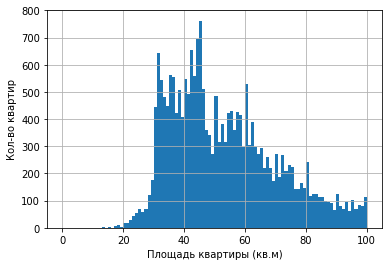

In [46]:
#На графике видно, что наиболее плотная масса распределения сконцентрирована от 30м до 80, а дальше уходит на спад
data['total_area'].hist(bins=100, range=(0, 100))
plt.xlabel('Площадь квартиры (кв.м)')
plt.ylabel('Кол-во квартир')

In [47]:
3
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [48]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

На графике заметно, что квартиры образно расцениваются от 2 до 6 миллионов ,на мой субъективный взгляд, но значения квантилей говорят, что 25персентиль начинается 3,4 млн рублей 

Text(0, 0.5, 'Кол-во')

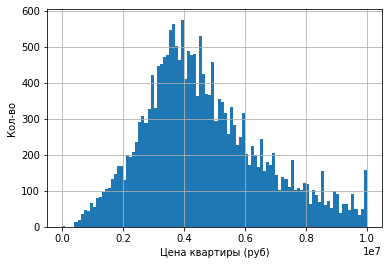

In [49]:
data['last_price'].hist(bins=100, range=(0, 10000000))
plt.xlabel('Цена квартиры (руб)')
plt.ylabel('Кол-во')

(0, 15000000)

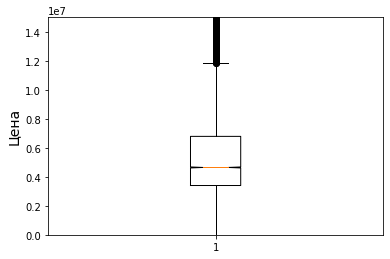

In [50]:
#Посмотрим эти же значения на графике boxplot
ax=plt.subplot()
ax.boxplot(data['last_price'], range(0, 5000000))
plt.ylabel('Цена', fontsize=14)
plt.ylim(0,15_000_000)


Ограничил ценовую область до 15ти миллионов руб.


Видим, что 75% не превышает 7-8млн, после 12млн уже идут выбросы



In [51]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Text(0, 0.5, 'Кол-во квартир')

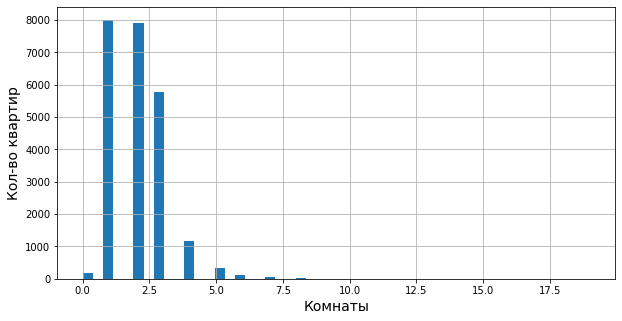

In [52]:
data['rooms'].hist(bins=50, figsize=(10,5))

plt.xlabel('Комнаты',fontsize=14)
plt.ylabel('Кол-во квартир',fontsize=14)


In [53]:
data.query('10<rooms<20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,days_exposition,sq_m_price,publication_day,publication_month,publication_month_num,publiction_year,floor_type,living_total_area_ratio,kitchen_total_area_ratio
645,3,17500000,183.7,2018-07-01,11,3.40,7,138.8,7,False,...,0.0,NaN,95264,Sunday,July,7,2018,последний,0.755580,0.072401
862,5,25000000,363.0,2017-12-23,14,3.16,5,222.0,4,False,...,2.0,418.0,68870,Saturday,December,12,2017,другой,0.611570,0.045730
5330,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,0.0,14.0,110169,Thursday,February,2,2019,другой,0.693220,0.169492
9642,8,33000000,194.1,2017-02-07,11,3.43,5,129.0,2,False,...,2.0,813.0,170015,Tuesday,February,2,2017,другой,0.664606,0.061309
14414,6,32250000,374.6,2018-06-09,19,2.65,5,264.5,2,False,...,2.0,114.0,86091,Saturday,June,6,2018,другой,0.706086,0.073679
18744,6,28500000,270.0,2015-03-02,16,3.00,4,180.0,4,False,...,0.0,1365.0,105555,Monday,March,3,2015,последний,0.666667,0.048148
19431,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,2.0,106.0,466666,Wednesday,December,12,2017,последний,0.455222,0.124444
20712,6,28659000,245.4,2016-03-31,14,2.65,4,168.3,2,False,...,2.0,95.0,116784,Thursday,March,3,2016,другой,0.685819,0.105542


In [54]:
data.query('5<rooms<10').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,ponds_around3000,days_exposition,sq_m_price,publication_month_num,publiction_year,living_total_area_ratio,kitchen_total_area_ratio
count,183.000000,1.830000e+02,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,177.000000,178.000000,178.000000,178.000000,128.00000,1.830000e+02,183.000000,183.000000,183.000000,183.000000
mean,11.049180,3.949818e+07,231.039617,6.584699,3.114208,5.846995,151.055355,4.049180,24.063607,0.278689,24711.378531,6065.685393,1.269663,1.224719,270.25000,1.493613e+05,6.169399,2017.393443,0.686091,0.107212
std,6.677236,6.904230e+07,101.926599,0.799853,0.472559,2.783108,55.179216,2.811434,13.664046,0.714015,6382.272170,6089.338421,1.071079,1.091858,258.30919,1.730230e+05,3.382038,1.063046,0.185799,0.043000
min,0.000000,4.390000e+06,87.000000,6.000000,2.500000,2.000000,57.400000,1.000000,5.000000,0.000000,10328.000000,423.000000,0.000000,0.000000,7.00000,2.891900e+04,1.000000,2014.000000,0.179444,0.025381
25%,5.000000,1.517500e+07,162.000000,6.000000,2.650000,5.000000,109.905000,2.000000,15.200000,0.000000,21504.000000,3156.750000,0.000000,0.000000,84.50000,8.626700e+04,3.000000,2017.000000,0.621242,0.076424
50%,11.000000,2.150000e+07,206.000000,6.000000,3.000000,5.000000,145.000000,4.000000,20.300000,0.000000,24253.000000,4747.000000,1.000000,1.000000,176.50000,1.026310e+05,6.000000,2017.000000,0.679605,0.099502
75%,19.000000,3.500000e+07,276.125000,7.000000,3.400000,6.000000,180.900000,5.000000,28.000000,0.000000,25801.000000,5716.000000,2.000000,2.000000,407.50000,1.477345e+05,9.000000,2018.000000,0.734960,0.129777
max,20.000000,7.630000e+08,631.200000,9.000000,5.200000,20.000000,347.500000,18.000000,74.935839,5.000000,54990.000000,34251.000000,3.000000,3.000000,1350.00000,1.907500e+06,12.000000,2019.000000,2.127237,0.261190


    
Видим, что основная часть объектов имеет комнатность в пределах 3, но есть множество выбросов


In [55]:
data['ceiling_height'].describe()

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Text(0, 0.5, 'Количество квартир')

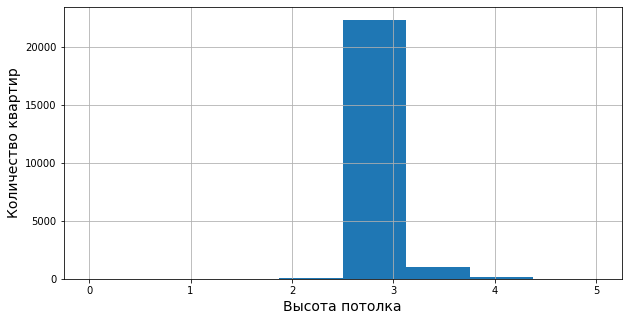

In [56]:
data['ceiling_height'].hist(bins=8, range=(0,5), figsize=(10,5))
plt.xlabel('Высота потолка', fontsize=14)
plt.ylabel('Количество квартир', fontsize=14)

In [57]:
data.query('ceiling_height>4')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,days_exposition,sq_m_price,publication_day,publication_month,publication_month_num,publiction_year,floor_type,living_total_area_ratio,kitchen_total_area_ratio
154,1,8200000,80.0,2018-11-06,3,4.15,3,44.2,2,False,...,1.0,38.0,102500,Tuesday,November,11,2018,другой,0.552500,0.152500
353,17,3600000,55.2,2018-07-12,2,25.00,5,32.0,2,False,...,NaN,259.0,65217,Thursday,July,7,2018,другой,0.579710,0.187340
461,15,66571000,280.3,2015-06-11,6,5.20,8,159.5,7,False,...,1.0,578.0,237499,Thursday,June,6,2015,другой,0.569033,0.075276
1022,20,155000000,310.0,2018-10-12,5,5.30,3,190.0,3,False,...,1.0,NaN,500000,Friday,October,10,2018,последний,0.612903,0.203226
1049,13,550000,29.0,2018-02-01,1,5.00,3,36.6,1,False,...,NaN,6.0,18965,Thursday,February,2,2018,первый,1.262069,0.187340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22184,20,5300000,45.0,2017-09-30,1,10.30,16,15.5,15,False,...,2.0,136.0,117777,Saturday,September,9,2017,другой,0.344444,0.187340
22211,19,9999000,92.4,2019-04-05,2,32.00,6,55.5,5,False,...,3.0,NaN,108214,Friday,April,4,2019,другой,0.600649,0.178571
22368,7,91075000,491.0,2017-05-27,5,4.20,9,274.0,9,False,...,0.0,115.0,185488,Saturday,May,5,2017,последний,0.558045,0.091650
22739,0,15000000,25.0,2018-07-25,1,100.00,5,14.0,5,True,...,3.0,19.0,600000,Wednesday,July,7,2018,последний,0.560000,0.440000



75% наблюдений укладываются по потолкам до 2.7 метров, при этом у нас есть аномалии как внизу, так и вверху
    


Text(0, 0.5, 'Кол-во квартир')

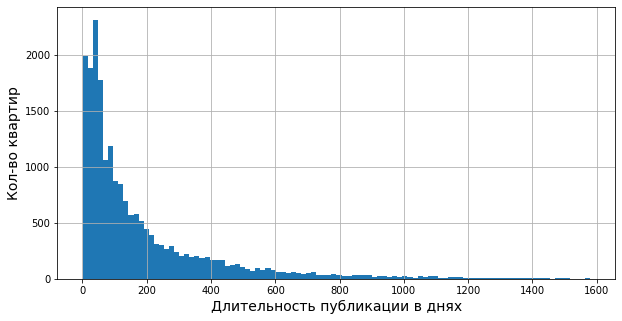

In [58]:
#Изучаем время продажи квартиры
# Будем смотреть на столбец days_exposition — сколько дней было размещено объявление (от публикации до снятия)

data['days_exposition'].hist(bins=100, figsize=(10,5))

plt.xlabel('Длительность публикации в днях', fontsize=14)
plt.ylabel('Кол-во квартир', fontsize=14)



Видим, что у нуля слишком большой столбец, полагаю это из-за заполнения пропусков нулем


In [59]:
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [60]:
# fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
# axs[0].plot(data['days_exposition'], title='days')
# axs[1].plot(data['total_images'])
# axs[2].plot('rooms')

*Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

*Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

In [61]:
print('Среднее время продажи квартир:', data['days_exposition'].mean())
print('Медиана:', data['days_exposition'].median())

Среднее время продажи квартир: 180.7413945278023
Медиана: 95.0


Text(0, 0.5, 'Время продажи')

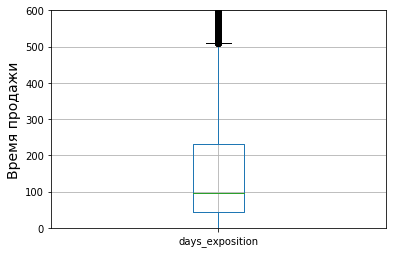

In [62]:
data.boxplot('days_exposition')
plt.ylim(0,600)
plt.ylabel('Время продажи', fontsize=14)

In [63]:
q3 = data['days_exposition'].quantile(0.75)
iqr_days_exposition = data['days_exposition'].quantile(0.75) - data['days_exposition'].quantile(0.25)
limit_q3 = q3 + 1.5*iqr_days_exposition

#Посчитаем значения границ в окрестности +/-1.5 IQR и всё, что будет находится внутри этой окр-ти будем считать \
#, что продажа прошла довольно быстро

anomaly_part = len(data[data['days_exposition']>464]) / len(data)
print(f'Значения, которые превышают {int(limit_q3)} дней будем считать, что продажа длилась довольно долго')
print('Процент выбивающихся значений от общей выборки: {:.0%}'.format(anomaly_part))

Значения, которые превышают 510 дней будем считать, что продажа длилась довольно долго
Процент выбивающихся значений от общей выборки: 9%



Видим, что основная часть наблюдений продается до 199 дней, при этом среднее ощутимо больше медианы, что говорит о правом скосе распределения из-за выбросов. Соглашусь с тем, что продажи выше 464-500 дней можно считать выбросами.




 Если учесть, что верхняя граница для выбросов - 464дней (upper bond), то условимся считать, что продажи прошли быстро если они попали в область самой коробки нашего графика boxplot, а именно в границы между 25 и 75 перцентилем, где сосредоточены 50% наблюдений времени продажи квартиры.
 
Если смотреть по графику ниже, то это примерно от 45 до 231 дня.

In [64]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'ponds_around3000', 'days_exposition', 'sq_m_price',
       'publication_day', 'publication_month', 'publication_month_num',
       'publiction_year', 'floor_type', 'living_total_area_ratio',
       'kitchen_total_area_ratio'],
      dtype='object')

In [ ]:
# КОД РЕВЬЮВЕРА

# можно совмещать ящик и распределение + статистики, таким подходом мы подстрелим сразу несколько зайцев:

# оценим распределение \ типичный портрет \ границы выбросов


def iqr(df, column):
    
    """
    Функция подсчитывает диапазон с учетом межквартильного размаха
    """
    
    
    
    
    iqr = df[column].describe()[6] - df[column].describe()[4] # считаем межквартильный размах
    
    low_bond = df[column].describe()[4] - 1.5 * iqr # подсчитываем нижнюю границу
    
    if low_bond < 0:
        
        # бывает так, что нижняя граница уходит в минус, это означает, что ей можно присвоить минимум признака
        
        low_bond = df[column].describe()[3]
    
    upper_bond = df[column].describe()[6] + 1.5 * iqr # считаем верхнюю границу
    
    print('Нижняя граница:', low_bond)
    print('Верхняя граница:', upper_bond)
    
    

import plotly.express as px # импорт классной библиотеки


# перечислим необходимые признаки
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition', 'sq_m_price', 'living_area', 'kitchen_area']


# для каждого признака из списка выше необходимо вывести статистики и построить график + подсчитать адекватный размах с учетом функции iqr (выше которая прописана)
for column in data[columns].columns:
    
    print('Признак', column, ':')
    
    print(data[column].describe())
    
    fig = px.histogram(data, x = column, marginal = 'box', title = column)
    fig.show()
    
    # добавим функцию для подсчета ограничений
    print('Адекватный диапазон значений признака', column)
    iqr(data, column)
    print()



## Сформируем новый датасет , где сведём выбросы из каждого столбца на нет

Приемлемыми значениями будем считать те, которые попадают в интервал [Q1 - 1.5*IQR; Q3 + 1.5*IQR ], где IQR - межквартильный размах

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 28 columns):
total_images                23565 non-null int64
last_price                  23565 non-null int64
total_area                  23565 non-null float64
first_day_exposition        23565 non-null datetime64[ns]
rooms                       23565 non-null int64
ceiling_height              23565 non-null float64
floors_total                23565 non-null int64
living_area                 23565 non-null float64
floor                       23565 non-null int64
is_apartment                23565 non-null bool
studio                      23565 non-null bool
open_plan                   23565 non-null bool
kitchen_area                23565 non-null float64
balcony                     23565 non-null int64
locality_name               23565 non-null object
airports_nearest            18041 non-null float64
cityCenters_nearest         18064 non-null float64
parks_around3000            18065 non-n

ValueError: num must be 1 <= num <= 6, not 7

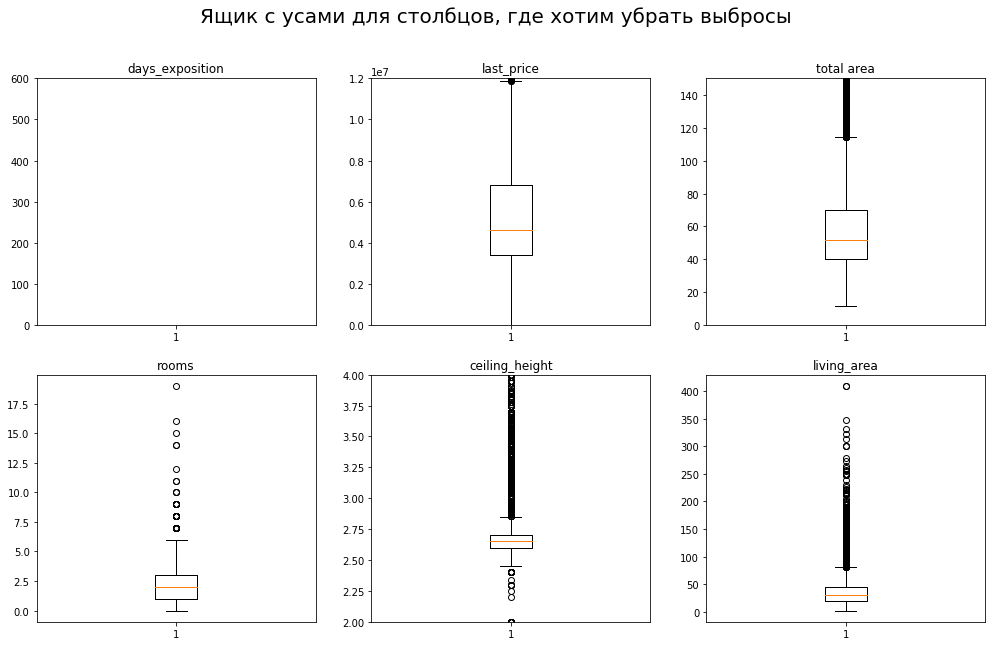

In [67]:
fig = plt.figure(figsize=(17, 10))
fig.suptitle('Ящик с усами для столбцов, где хотим убрать выбросы', fontsize=20)
ax1 = fig.add_subplot(231)
ax1.set_title('days_exposition')
ax1.boxplot(data['days_exposition'])
plt.ylim(0, 600)


ax2 = fig.add_subplot(232)
ax2.set_title('last_price')
ax2.boxplot(data['last_price'])
plt.ylim(0, 12_000_000)

ax3 = fig.add_subplot(233)
ax3.set_title('total area')
ax3.boxplot(data['total_area'])
plt.ylim(0,150)


ax4 = fig.add_subplot(234)
ax4.set_title('rooms')
ax4.boxplot(data['rooms'])

ax5 = fig.add_subplot(235)
ax5.set_title('ceiling_height')
ax5.boxplot(data['ceiling_height'])
plt.ylim(2, 4)

ax6 = fig.add_subplot(236)
ax6.set_title('living_area')
ax6.boxplot(data['living_area'])
#plt.ylim(2, 4)


ax7 = fig.add_subplot(237)
ax7.set_title('kitchen_area')
ax7.boxplot(data['kitchen_area'])
#plt.ylim(2, 4)


In [69]:
#Создадим словарь пороговых значений по которому будем делать срез по всей совокупности

#UPD: Добавил признаки living_area, kitchen_area
data_labels = ['days_exposition', 'last_price', 'total_area', 'rooms', 'ceiling_height', 'living_area', 'kitchen_area']

def treshold_dict(labels):
    treshold= {}
    for label in data_labels:
        current = data[label]
        q1 = current.quantile(0.25)
        q3 = current.quantile(0.75)
        iqr = q3 - q1
        lim_min = q1 - 1.5*iqr
        lim_max = q3 + 1.5*iqr
        treshold[label] = [lim_min, lim_max]
    return treshold

treshold_dict(data_labels)

#В словаре хранятся нижняя, а потом верхняя границы усов

{'days_exposition': [-234.0, 510.0],
 'last_price': [-1685000.0, 11875000.0],
 'total_area': [-4.550000000000004, 114.25],
 'rooms': [-2.0, 6.0],
 'ceiling_height': [2.45, 2.8500000000000005],
 'living_area': [-18.5, 81.5],
 'kitchen_area': [-0.5, 19.5]}

(0, 200)

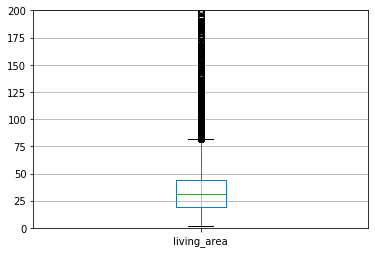

In [70]:
data.boxplot('living_area')
plt.ylim(0,200)

(0, 80)

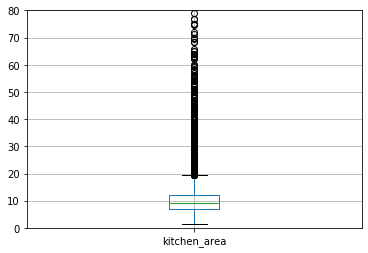

In [71]:
data.boxplot('kitchen_area')
plt.ylim(0,80)

 Ситаем время продажи квартиры приемлемым, если оно не больше 465 дней

 Судя по графику boxplot для столбца `ceiling_height` видим ,что есть аномальные значения снизу, поэтому следует учесть этот факт , когда будем делать срез по нашей совокупности

In [72]:
#Создадим срез по нашему словарю

clear_data = data.query('days_exposition <= 464  and 500_000 <= last_price <= 11_900_000  and  total_area <= 114.75  and \
rooms <= 6  and  2.45<=ceiling_height<=2.85 and living_area <= 81.5 and kitchen_area <= 19.5')
clear_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,days_exposition,sq_m_price,publication_day,publication_month,publication_month_num,publiction_year,floor_type,living_total_area_ratio,kitchen_total_area_ratio
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0.0,81.0,82920,Tuesday,December,12,2018,первый,0.460396,0.272277
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,55.0,95065,Monday,September,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0.0,155.0,99195,Thursday,November,11,2017,другой,0.284182,0.386059
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,NaN,189.0,87454,Wednesday,May,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0.0,289.0,88524,Sunday,February,2,2017,другой,0.714754,0.106557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23553,6,3200000,39.00,2017-12-16,1,2.65,9,20.00,6,False,...,0.0,38.0,82051,Saturday,December,12,2017,другой,0.512821,0.282051
23556,3,5500000,52.00,2018-07-19,2,2.65,5,31.00,2,False,...,0.0,15.0,105769,Thursday,July,7,2018,другой,0.596154,0.115385
23558,2,1350000,30.00,2017-07-07,1,2.65,5,17.50,4,False,...,NaN,413.0,45000,Friday,July,7,2017,другой,0.583333,0.200000
23559,9,4600000,62.40,2016-08-05,3,2.60,9,40.00,8,False,...,1.0,239.0,73717,Friday,August,8,2016,другой,0.641026,0.128205


In [73]:
clear_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,ponds_around3000,days_exposition,sq_m_price,publication_month_num,publiction_year,living_total_area_ratio,kitchen_total_area_ratio
count,15405.000000,1.540500e+04,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,11447.000000,11459.000000,11459.000000,11459.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000
mean,9.516845,4.500293e+06,50.229772,1.826550,2.628611,11.350665,30.460568,6.176306,9.062141,0.612334,29351.569582,15679.369578,0.492277,0.642639,117.145407,90564.505420,6.607920,2017.385784,0.601477,0.189798
std,5.511778,1.955357e+06,16.274179,0.852027,0.079228,6.678777,13.354122,5.017233,2.914986,0.933899,13344.391615,8114.572286,0.715272,0.834205,109.837568,27914.106604,3.488247,0.830097,0.174647,0.061627
min,0.000000,5.000000e+05,12.000000,0.000000,2.450000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,399.000000,0.000000,0.000000,1.000000,9615.000000,1.000000,2015.000000,0.069588,0.043524
25%,6.000000,3.200000e+06,37.500000,1.000000,2.600000,5.000000,18.000000,2.000000,6.800000,0.000000,17674.000000,11490.500000,0.000000,0.000000,38.000000,74342.000000,3.000000,2017.000000,0.500000,0.143145
50%,9.000000,4.150000e+06,46.000000,2.000000,2.650000,9.000000,29.000000,5.000000,8.600000,0.000000,28118.000000,14114.000000,0.000000,0.000000,75.000000,91463.000000,7.000000,2017.000000,0.575758,0.187340
75%,13.000000,5.490000e+06,60.000000,2.000000,2.650000,16.000000,38.500000,8.000000,10.800000,1.000000,39180.000000,16919.000000,1.000000,1.000000,167.000000,107000.000000,10.000000,2018.000000,0.653571,0.227692
max,39.000000,1.190000e+07,114.300000,6.000000,2.850000,52.000000,80.000000,33.000000,19.500000,5.000000,83758.000000,64857.000000,3.000000,3.000000,464.000000,292307.000000,12.000000,2019.000000,2.815385,0.739837


## Исследуем факторы, которые влияют на стоимость квартиры

площади, числа комнат, удалённости от центра.
изучите зависимость от даты размещения: дня недели, месяца и года.

In [74]:
#для наглядности отберём целевые столбцы для выявления зависимости между признаками и ценой
price_drivers = clear_data[['total_area', 'rooms', 'cityCenters_nearest', 'last_price', 'publication_day', 'publication_month','publication_month_num','publiction_year', 'sq_m_price']]
price_drivers

,total_area,rooms,cityCenters_nearest,last_price,publication_day,publication_month,publication_month_num,publiction_year,sq_m_price
1,40.40,1,18603.0,3350000,Tuesday,December,12,2018,82920
5,30.40,1,NaN,2890000,Monday,September,9,2018,95065
6,37.30,1,19143.0,3700000,Thursday,November,11,2017,99195
8,33.16,1,NaN,2900000,Wednesday,May,5,2018,87454
9,61.00,3,15008.0,5400000,Sunday,February,2,2017,88524
...,...,...,...,...,...,...,...,...,...
23553,39.00,1,16704.0,3200000,Saturday,December,12,2017,82051
23556,52.00,2,6263.0,5500000,Thursday,July,7,2018,105769
23558,30.00,1,NaN,1350000,Friday,July,7,2017,45000
23559,62.40,3,34104.0,4600000,Friday,August,8,2016,73717


In [75]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'ponds_around3000', 'days_exposition', 'sq_m_price',
       'publication_day', 'publication_month', 'publication_month_num',
       'publiction_year', 'floor_type', 'living_total_area_ratio',
       'kitchen_total_area_ratio'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b792b2050>,
      dtype=object)

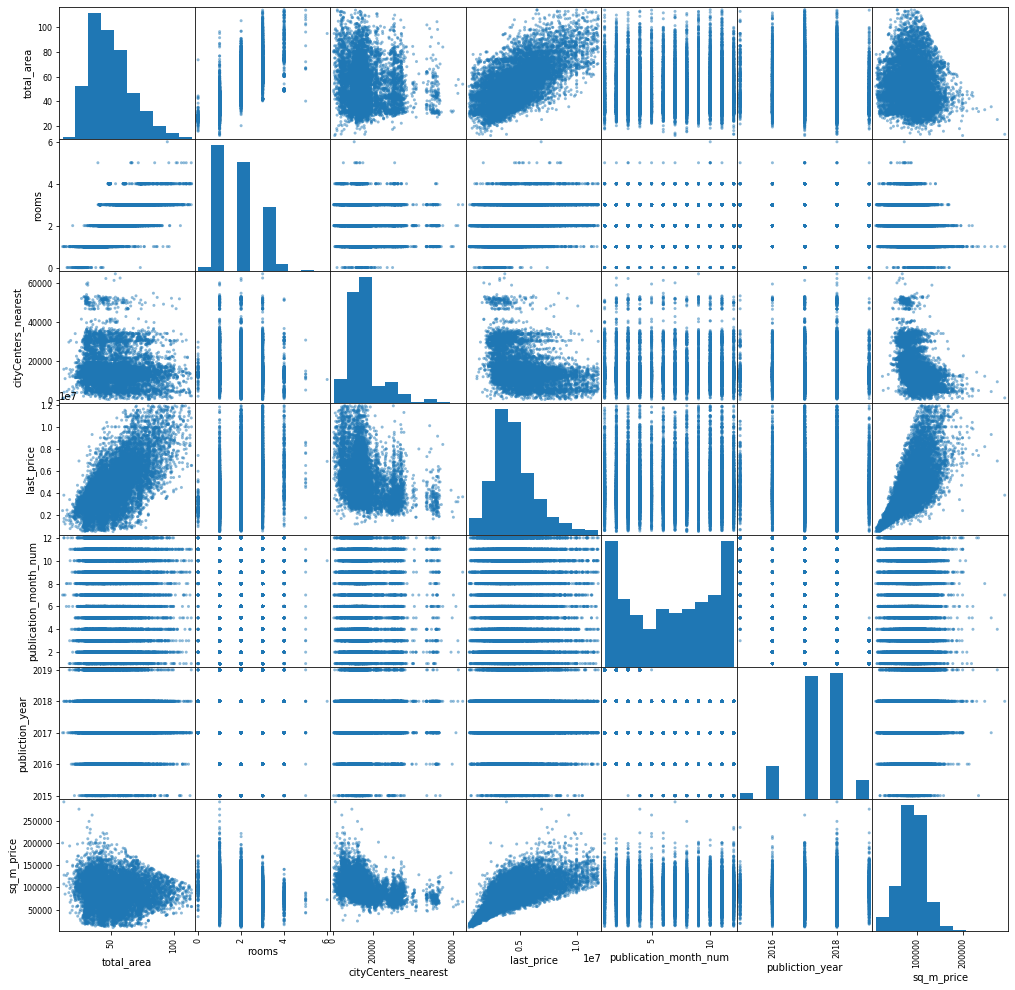

In [77]:
pd.plotting.scatter_matrix(price_drivers, figsize=(17,17))

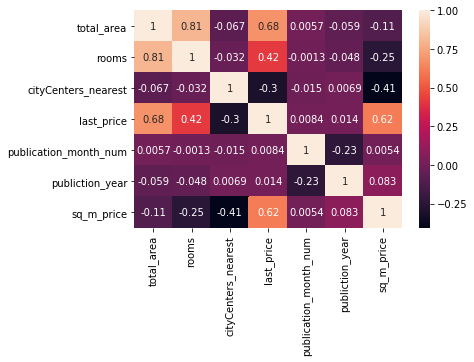

In [78]:
sns.heatmap(price_drivers.corr(), annot=True);


Отлично, видим, что добавленная цена за кв имеет отрицательную корреляцию с площадью  \ комнатами, чего не скажешь об общей цене


Просматривая корреляционную матрицу, видим,что на цену оказывает большое влияние площадь квартиры.
    Следующий по значимости показатель - это число комнат, его мы посмторим детальнее. Расстояние от центра также показывает наличие зависимости (отрицательной), чем меньше расстояние от центра, тем оно существеннее влияет на цену (хотя не очень сильно, т.к коэф-т -0,3)
    А явной зависимости между датой объявления и ценой не наблюдается

In [79]:
#Изучаем временные признаки

price_drivers['publiction_year'].value_counts().sort_values()

2015     310
2019     924
2016    1628
2017    6200
2018    6343
Name: publiction_year, dtype: int64

<font size='3'> По приведённому ниже графику не трудно заметить, что к 16му году цена падает и стабильно держится до отметки в 4.5млн руб до 18 года, а послу уже начинается резкий подъём цен

Text(0, 0.5, 'Стоимость квартиры')

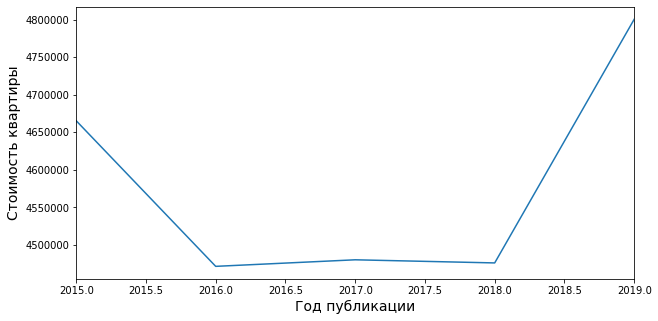

In [80]:
#Посмотрим как менялись цены на квартиры с 15 по 19 год

grouped_by_years = price_drivers.groupby('publiction_year')['last_price'].mean()
grouped_by_years.plot(kind='line', figsize=(10,5))
plt.xlabel('Год публикации', fontsize=14)
plt.ylabel('Стоимость квартиры', fontsize=14)

<font size='3'> А здесь имеем явную просадку в цене к середине года, то есть в июне.

Text(0, 0.5, 'Стоимость квартиры')

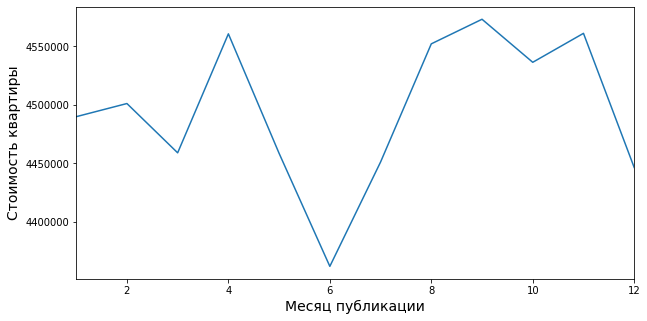

In [81]:
#Глянем на месяцы

grouped_by_months = price_drivers.sort_values(by='publication_month_num').groupby('publication_month_num') \
    ['last_price'].mean()
# grouped_by_months.plot(kind='line', figsize=(10,5))
# plt.xlabel('Месяц публикации', fontsize=14)
# plt.ylabel('Стоимость квартиры', fontsize=14)
grouped_by_months.plot(kind='line',figsize=(10,5))
plt.xlabel('Месяц публикации', fontsize=14)
plt.ylabel('Стоимость квартиры', fontsize=14)

Заметно,что цены на выходных днях чуть ниже чем в остальные дни

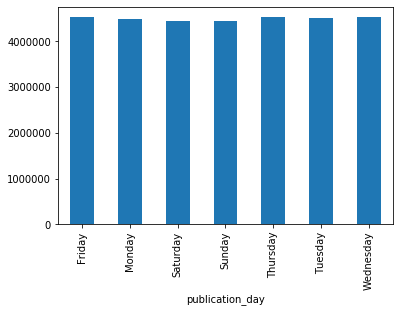

In [82]:
grouped_by_days = price_drivers.sort_values(by='publication_day').groupby('publication_day') \
    ['last_price'].mean()

grouped_by_days.plot(kind='bar')

In [83]:
#Посчитаем медианную стоимость для каждого типа этажей
grouped_by_floor_type = clear_data.groupby('floor_type')['last_price'].median()
grouped_by_floor_type

floor_type
другой       4300000
первый       3550000
последний    3800000
Name: last_price, dtype: int64

А здесь наблюдается "эффект края", т.е первый и последний этаж не сильно разнятся по стоимости, а промежуточные этажи по стоимсоти дороже, т.е чем выше- тем дороже в среднем

 
Да, видимо люди боятся проблем с крышей, любопытными пешеходами и шумом из-за лифтовых шахт \ входной двери


**Выделим 10 пунктов с наибольшим количеством объявлений**

In [84]:
table_data = clear_data.pivot_table(index='locality_name', values='last_price', aggfunc='count') \
    .sort_values(by='last_price', ascending=False) \
    .head(10)



In [85]:
table_data

,last_price
locality_name,
Санкт-Петербург,9636
посёлок Мурино,465
посёлок Шушары,372
Всеволожск,281
посёлок Парголово,277
Колпино,268
деревня Кудрово,247
Пушкин,223
Гатчина,223


In [88]:
print(round(clear_data.query('locality_name in @table_data.index').pivot_table(index='locality_name', values='sq_m_price', aggfunc=['mean', 'max', 'min']) \
            
            
            
           ))

                        mean        max        min
                  sq_m_price sq_m_price sq_m_price
locality_name                                     
Всеволожск           66691.0     136125      40029
Выборг               56872.0      93181      18750
Гатчина              67911.0     105818      10897
Колпино              74740.0     118694      47957
Пушкин               98438.0     166666      59836
Санкт-Петербург     103557.0     292307      24439
деревня Кудрово      93252.0     142857      54160
посёлок Мурино       86020.0     138580      50000
посёлок Парголово    89256.0     138522      48405
посёлок Шушары       77741.0     147826      47833


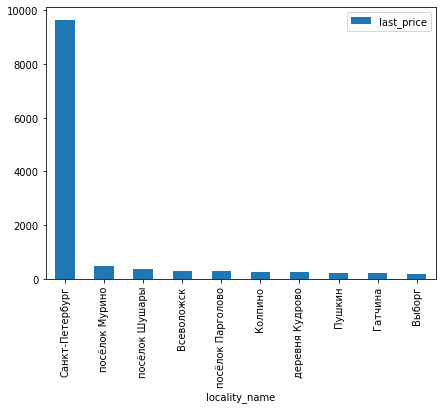

In [89]:
table_data.plot(kind='bar', figsize=(7,5))

Итого самая высокая стоимость жилья - в Петербурге, низкая в Выборге.

In [90]:
saint_p = clear_data.query('locality_name == "Санкт-Петербург" ').copy()
saint_p['center_dist_km'] = saint_p['cityCenters_nearest'] / 1000
# saint_p['center_dist_km'].astype(int)
#Заполним пропущенные значения медианным для дальнейшего приведения к типу int
saint_p['center_dist_km'] = saint_p['center_dist_km'].fillna(saint_p['center_dist_km'].median())
saint_p['center_dist_km'] = saint_p['center_dist_km'].astype(int)
saint_p.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,sq_m_price,publication_day,publication_month,publication_month_num,publiction_year,floor_type,living_total_area_ratio,kitchen_total_area_ratio,center_dist_km
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,289.0,88524,Sunday,February,2,2017,другой,0.714754,0.106557,15
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,137.0,127525,Thursday,November,11,2017,другой,0.512626,0.214646,13
15,16,4650000,39.0,2017-11-18,1,2.65,14,20.5,5,False,...,19.0,119230,Saturday,November,11,2017,другой,0.525641,0.194872,14
18,8,3250000,31.0,2017-01-27,1,2.50,5,19.4,2,False,...,168.0,104838,Friday,January,1,2017,другой,0.625806,0.180645,10
21,13,3200000,31.6,2018-03-14,1,2.65,5,16.9,2,False,...,310.0,101265,Wednesday,March,3,2018,другой,0.534810,0.180380,9


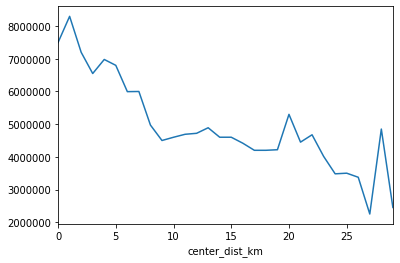

In [91]:
#Посчитаем среднюю цену для каждого километра от центра
grouped_dist_by_center = saint_p.groupby('center_dist_km')['last_price'].median().plot(kind='line')
grouped_dist_by_center




In [92]:
saint_p['centered'] = saint_p['center_dist_km'].apply(lambda x: True if x <= 10 else False)
saint_p

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,sq_m_price,publication_day,publication_month,publication_month_num,publiction_year,floor_type,living_total_area_ratio,kitchen_total_area_ratio,center_dist_km,centered
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,88524,Sunday,February,2,2017,другой,0.714754,0.106557,15,False
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,127525,Thursday,November,11,2017,другой,0.512626,0.214646,13,False
15,16,4650000,39.0,2017-11-18,1,2.65,14,20.5,5,False,...,119230,Saturday,November,11,2017,другой,0.525641,0.194872,14,False
18,8,3250000,31.0,2017-01-27,1,2.50,5,19.4,2,False,...,104838,Friday,January,1,2017,другой,0.625806,0.180645,10,True
21,13,3200000,31.6,2018-03-14,1,2.65,5,16.9,2,False,...,101265,Wednesday,March,3,2018,другой,0.534810,0.180380,9,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,19,3550000,36.4,2016-06-08,1,2.65,16,14.9,13,False,...,97527,Wednesday,June,6,2016,другой,0.409341,0.255495,11,False
23547,13,5250000,43.0,2018-05-11,2,2.50,5,29.0,2,False,...,122093,Friday,May,5,2018,другой,0.674419,0.139535,7,True
23552,8,3300000,31.0,2017-04-29,1,2.55,9,18.0,6,False,...,106451,Saturday,April,4,2017,другой,0.580645,0.209677,11,False
23553,6,3200000,39.0,2017-12-16,1,2.65,9,20.0,6,False,...,82051,Saturday,December,12,2017,другой,0.512821,0.282051,16,False


In [93]:
spb_centered = saint_p.query('centered==True')
spb_centered
#2810 квартир в центре

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,sq_m_price,publication_day,publication_month,publication_month_num,publiction_year,floor_type,living_total_area_ratio,kitchen_total_area_ratio,center_dist_km,centered
18,8,3250000,31.0,2017-01-27,1,2.50,5,19.4,2,False,...,104838,Friday,January,1,2017,другой,0.625806,0.180645,10,True
21,13,3200000,31.6,2018-03-14,1,2.65,5,16.9,2,False,...,101265,Wednesday,March,3,2018,другой,0.534810,0.180380,9,True
26,6,4050000,60.0,2017-04-28,4,2.65,5,43.0,4,False,...,67500,Friday,April,4,2017,другой,0.716667,0.116667,10,True
56,14,4350000,41.0,2016-03-28,1,2.80,7,18.1,4,False,...,106097,Monday,March,3,2016,другой,0.441463,0.270732,9,True
65,7,4400000,57.0,2018-03-03,3,2.50,5,39.0,2,False,...,77192,Saturday,March,3,2018,другой,0.684211,0.122807,10,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23511,7,4990000,62.5,2018-04-26,2,2.70,4,32.3,4,False,...,79840,Thursday,April,4,2018,последний,0.516800,0.193600,4,True
23525,11,4900000,60.0,2015-12-15,3,2.60,15,39.5,2,False,...,81666,Tuesday,December,12,2015,другой,0.658333,0.126667,10,True
23531,11,4250000,47.0,2016-05-20,1,2.65,6,18.2,1,False,...,90425,Friday,May,5,2016,первый,0.387234,0.310638,4,True
23547,13,5250000,43.0,2018-05-11,2,2.50,5,29.0,2,False,...,122093,Friday,May,5,2018,другой,0.674419,0.139535,7,True


In [94]:
spb_centered.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,cityCenters_nearest,parks_around3000,ponds_around3000,days_exposition,sq_m_price,publication_month_num,publiction_year,living_total_area_ratio,kitchen_total_area_ratio,center_dist_km
count,2439.000000,2.439000e+03,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,...,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000
mean,9.237802,5.876196e+06,53.384490,1.922919,2.636544,10.072981,32.429971,5.403854,9.252094,0.469045,...,7755.031160,0.732267,0.859369,117.309143,111941.106191,6.478475,2017.332513,0.604550,0.182519,7.237392
std,5.550280,2.177004e+06,18.408804,0.864843,0.080842,5.931763,14.109216,4.200531,3.252277,0.833421,...,2619.812618,0.812679,0.975660,109.700766,26059.876901,3.401769,0.863852,0.164972,0.061850,2.586609
min,0.000000,1.686000e+06,12.000000,0.000000,2.450000,2.000000,6.000000,1.000000,2.000000,0.000000,...,399.000000,0.000000,0.000000,3.000000,26250.000000,1.000000,2015.000000,0.193548,0.059933,0.000000
25%,5.000000,4.150000e+06,40.000000,1.000000,2.600000,5.000000,19.200000,2.000000,6.400000,0.000000,...,5644.000000,0.000000,0.000000,36.000000,93779.500000,3.000000,2017.000000,0.514612,0.136311,5.000000
50%,9.000000,5.400000e+06,48.900000,2.000000,2.650000,9.000000,30.300000,4.000000,8.500000,0.000000,...,8409.000000,1.000000,1.000000,78.000000,107407.000000,6.000000,2017.000000,0.588235,0.178914,8.000000
75%,13.000000,7.200000e+06,64.750000,3.000000,2.650000,14.000000,41.000000,7.000000,11.110000,1.000000,...,10019.500000,1.000000,1.000000,167.500000,126289.000000,10.000000,2018.000000,0.661232,0.210526,10.000000
max,32.000000,1.190000e+07,114.200000,6.000000,2.850000,28.000000,77.000000,25.000000,19.500000,5.000000,...,10999.000000,3.000000,3.000000,464.000000,292307.000000,12.000000,2019.000000,2.772727,0.548387,10.000000


In [95]:
spb_centered_price_drivers = spb_centered[['balcony', 'floors_total','total_area', 'rooms','ceiling_height', 'center_dist_km', 'last_price', 'publication_day', 'publication_month','publiction_year', 'sq_m_price', 'publication_month_num', 'living_area', 'kitchen_area']]
spb_centered_price_drivers

,balcony,floors_total,total_area,rooms,ceiling_height,center_dist_km,last_price,publication_day,publication_month,publiction_year,sq_m_price,publication_month_num,living_area,kitchen_area
18,1,5,31.0,1,2.50,10,3250000,Friday,January,2017,104838,1,19.4,5.6
21,1,5,31.6,1,2.65,9,3200000,Wednesday,March,2018,101265,3,16.9,5.7
26,0,5,60.0,4,2.65,10,4050000,Friday,April,2017,67500,4,43.0,7.0
56,2,7,41.0,1,2.80,9,4350000,Monday,March,2016,106097,3,18.1,11.1
65,0,5,57.0,3,2.50,10,4400000,Saturday,March,2018,77192,3,39.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23511,0,4,62.5,2,2.70,4,4990000,Thursday,April,2018,79840,4,32.3,12.1
23525,0,15,60.0,3,2.60,10,4900000,Tuesday,December,2015,81666,12,39.5,7.6
23531,0,6,47.0,1,2.65,4,4250000,Friday,May,2016,90425,5,18.2,14.6
23547,0,5,43.0,2,2.50,7,5250000,Friday,May,2018,122093,5,29.0,6.0


In [96]:
spb_out_price_drivers = saint_p.query('centered==False')[['balcony', 'floors_total','total_area', 'rooms','ceiling_height', 'center_dist_km', 'last_price', 'publication_day', 'publication_month','publiction_year', 'sq_m_price', 'publication_month_num', 'living_area', 'kitchen_area']]
spb_out_price_drivers

,balcony,floors_total,total_area,rooms,ceiling_height,center_dist_km,last_price,publication_day,publication_month,publiction_year,sq_m_price,publication_month_num,living_area,kitchen_area
9,2,9,61.0,3,2.50,15,5400000,Sunday,February,2017,88524,2,43.6,6.5
10,0,12,39.6,1,2.67,13,5050000,Thursday,November,2017,127525,11,20.3,8.5
15,1,14,39.0,1,2.65,14,4650000,Saturday,November,2017,119230,11,20.5,7.6
25,2,23,76.0,2,2.75,14,6800000,Thursday,October,2015,89473,10,39.0,15.0
27,0,17,70.0,3,2.60,11,7100000,Friday,May,2017,101428,5,49.0,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23537,2,9,35.3,1,2.50,15,3450000,Friday,April,2017,97733,4,17.5,7.5
23539,2,9,23.0,1,2.80,11,3100000,Monday,March,2018,134782,3,12.6,5.0
23542,0,16,36.4,1,2.65,11,3550000,Wednesday,June,2016,97527,6,14.9,9.3
23552,0,9,31.0,1,2.55,11,3300000,Saturday,April,2017,106451,4,18.0,6.5


<Figure size 2160x720 with 0 Axes>

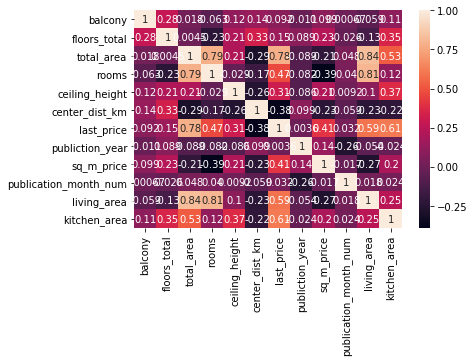

<Figure size 2160x720 with 0 Axes>

In [97]:
#Центральная часть Питера
sns.heatmap(spb_centered_price_drivers.corr(), annot=True)
plt.figure(figsize=(30,10))

<Figure size 2160x720 with 0 Axes>

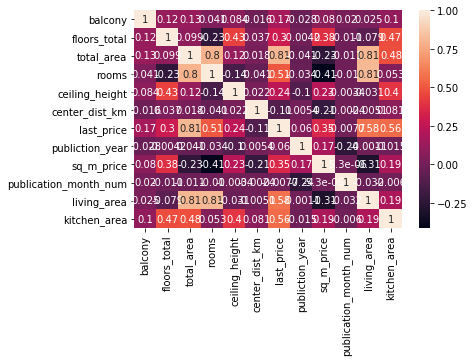

<Figure size 2160x720 with 0 Axes>

In [98]:
#Окраины

sns.heatmap(spb_out_price_drivers.corr(), annot=True)
plt.figure(figsize=(30,10))

In [99]:
print('Средняя цена за кв.м на окраинах СПб:', round(spb_out_price_drivers['sq_m_price'].mean()))
print('Средняя цена за кв.м в центре СПб:', round(spb_centered_price_drivers['sq_m_price'].mean()))

Средняя цена за кв.м на окраинах СПб: 100716
Средняя цена за кв.м в центре СПб: 111941


Судя по корреляционной матрице существуют 4 показателя , которые влияют на цену квартиры в окрестностях центра СПБ.
В первую очередь это площадь квартиры, далее идёт число комнат, более слабый вес влияния оказывает высота потолков(но всё же чем выше потолок, тем вероятнее больше стоимость. Возможно это как-то связано с ощущением пространства и даже некой свободы), ну и очевидно само расстояние- чем оно дальше от центра тем скорее всего такая квартира по стоимости будет дешевле чем та, которая ближе к центру. 

В этой ситуации мы учли высоту потолка и общее число этажей в отличие от предыдущего расчёта кор.матрицы и поняли, что эти факторы оказывают влияние на формирование цены, хоть и несильное , например floors_total.

In [100]:
saint_p.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'ponds_around3000', 'days_exposition', 'sq_m_price',
       'publication_day', 'publication_month', 'publication_month_num',
       'publiction_year', 'floor_type', 'living_total_area_ratio',
       'kitchen_total_area_ratio', 'center_dist_km', 'centered'],
      dtype='object')

In [ ]:
# КОД РЕВЬЮВЕРА

# я решил привести пример, чтобы было понятнее и нагляднее (p.s. если графики не будут отображаться, то просто перезапусти нотбук cell->run all)

#Добавил категорийный столбец в датафрейм спб

spb_data = saint_p.copy(deep = True) # на всякий случай создам отдельный датафрейм по копии твоего
spb_data['type_center']= spb_data.loc[spb_data['center_dist_km'] <= 8, 'type_center']='сenter'
spb_data.loc[spb_data['center_dist_km'] > 8, 'type_center']='outside_center'



# ПРИМЕР СОВМЕСТНОЙ ГИСТОГРАМКИ РАСПРЕДЕЛЕНИЯ

fig = px.histogram(spb_data, x = 'total_area', color = 'type_center', marginal = 'box',
                  title = 'Распределение площади для центра\области Спб')
fig.show()

# P.s. можно сделать через цикл по необходимому списку признаков (выше я давал пример)




# А ТЕПЕРЬ ПРИМЕР СОВМЕСТНОГО АНАЛИЗА ЧЕРЕЗ СВОДНЫЕ ТАБЛИЧКИ

# пусть будет этаж 

spb_floor = spb_data.pivot_table(index = ['type_center', 'floor_type'], values = 'last_price', aggfunc = 'mean').reset_index()
display(spb_floor)

fig = px.line(spb_floor, x = 'floor_type', color = 'type_center', y = 'last_price', title = 'Изменение цены в зав-ти от этажа')
fig.show()




# ПРИМЕР ОБЫЧНОГО ТОЧЕЧНОГО ГРАФИКА

fig = px.scatter(spb_data, x = 'total_area', y = 'last_price', color = 'type_center',
                 title = 'Корреляция цены в зав-ти от площади центр\область Спб')
fig.show()



# можно сравнивать средние и так

fig = px.bar(spb_data.pivot_table(index = 'type_center', values = 'ceiling_height', aggfunc = 'mean').reset_index(),
            x = 'type_center', y = 'ceiling_height', color = 'type_center',
            title = 'Средняя высота потолков центр\область Спб')
fig.show()



display(spb_data.pivot_table(index = 'type_center', values = ['total_area', 'last_price', 'rooms', 'ceiling_height'], aggfunc = 'mean'))

# корреляция (можно передать больше признаков)

display(spb_data.pivot_table(index = 'type_center', values = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'center_dist_km'], aggfunc = 'corr'))



Ну вот, как то так можно проводить совместный анализ центра\области Спб)
    
Думаю тебе может понадобиться в будущем:
    
    
`Scatterplot` для прослеживания зависимостей (можно корректировать цвет и размер точек в зависимости от вариации какого-либо признака): https://plotly.com/python/line-and-scatter/      
    
Мне кажется круто было бы добавить линии тренда https://plotly.com/python/linear-fits/
    
    
`Lineplot` https://plotly.com/python/line-charts/
    
    
`Barchart` https://plotly.com/python/bar-charts/ 
    
    
`Видим, что квартиры в центре обладают лучшими характеристиками, там они выше и распределения смещены вправо. При этом зависимость с этажом похожа на ту, что за областью за центром. Если рассматривать корреляцию, то мы видим, что в целом центр повторяет общую тенденцию: цена как и ранее ощутимо коррелирует с площадью \ комнатами \ высотой потолков. Но стоит отметить, что коэффициенты корреляции по некоторым признакам в центре меньше, чем за центром. Это наводит на мысль о том, что на цену в центре в большей степени влияет не сколько характеристики квартиры (которые также значимы), сколько сам факт хорошего месторасположения \ близости к историческим объектам архитектуры и тд.`



## Шаг 4. Вывод

На данном этапе мы исследовали распределения важных признаков (площади, цены и.т.д), избавились от выбивающихся (аномальных) значений, засчёт построения графиков boxplot и нахождения граничных значений по ним. Изучили факторы, влияющие на стоимость квартиры (площадь, комнаты, расстояние до центра) и примерное время их продажи. Вывели топ-10 пунктов с наибольшим количеством объявлений. Исследовали квартиры в окрестностях Питера (10км) и посмотрели какие факторы важны в ценообразовании (добавилась высота потолка).

In [102]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'ponds_around3000', 'days_exposition', 'sq_m_price',
       'publication_day', 'publication_month', 'publication_month_num',
       'publiction_year', 'floor_type', 'living_total_area_ratio',
       'kitchen_total_area_ratio'],
      dtype='object')

### Шаг 5. Общий вывод

Был проведён анализ первичного датасета с помщью описательных статистик. Устранили пропуски и привели данные к нужному типу там, где это уместно. Для полноты описания добавили новые признаки и исключили нейтральные. Построили гистограммы для необходимых признаков, изучили время продажи, и условились считать его приемлемым если оно не превышает 465 дней. Посмотрели на признаки через графики boxplot и избавились от аномальных значений с помощью среза по словарю пороговых значений. Изучали какие факторы играют важную роль в ценообразовании и самые важные из них - это **площадь**, **число комнат**, **удалённость от центра**. Вывели топ-10 с наибольшим числом объявлений, в котором Санкт-Петербург занял первое место. В среднем самые высокие цены оказались в СПб, а низкие в Выборге.
    
После анализа графика дистанции от центра , связанной со ср. стоимостью пришли к заключению, что центр - это радиус приблизительно 8-10 км. Дальше анализировали квартиры в самом центре, и утвердили зависимость между ценой и такими факторами, как площадь, число комнат, расстояние до центра и высота потолка.
    



Также добавил параметры <b>living_area, kitchen_area</b> в корреляционные матрицы (центр/окраина). Между ними есть определённая зависимость, а также они влияют на цену самой квартиры.


`Добавлю, что при сравнении квартир Питера в центре/на окраинах добавились новые особенности. Например, квартиры на первом этаже в среднем по стоимости самые низкие в обоих категориях(центр/окраина), но в целом высокие цены приходятся на долю квартир, находящихся в центре, у которых тип этажа floor_type - "другой", то есть промежуточный и на квартиры на последнем этаже в центральной части города по цене в среднем выше остальных. Также площадь и число комнат в центре больше чем на окраинах.Высота потолка незначительно выше в центре. В целом , судя по визуальному совместному графику, красная область накладывается поверх наблюдений(окраины), поэтому сделаем` вывод что в центре квартиры имеют преимущество по многим параметрам перед остальными квартирами 

центральные объекты действительно обладают преимуществом в виде характеристик и месторасположения, что обеспечивает им гораздо большую цену
